In [1]:
import importlib

import matplotlib.pyplot as plt
import numpy as np
import pipeline
from importlib import reload

reload(pipeline)

<module 'pipeline' from 'C:\\Users\\einkina\\Documents\\School\\Manifold Learning\\manifold-learning\\pipeline.py'>

In [2]:
reload(pipeline)
control_vars = pipeline.get_control_vars(pipeline.get_p())
response_matrix = pipeline.generate_array_of_swiss_rolls(control_vars)
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = pipeline.prepare_data(control_vars, response_matrix)

In [3]:
reload(pipeline)
q = pipeline.solve_semidefinite_programming(standardized_x, centered_y, edges)

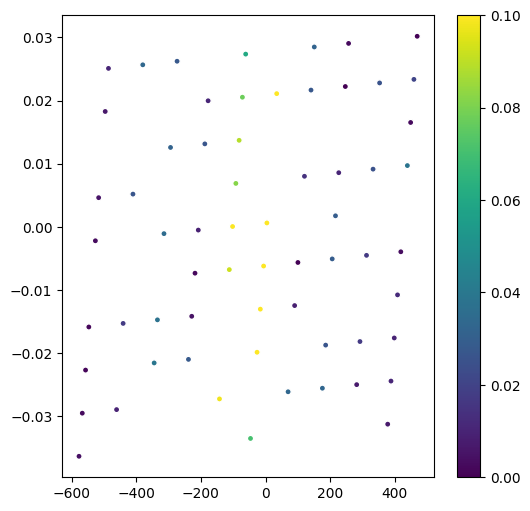

0.017968807501546058


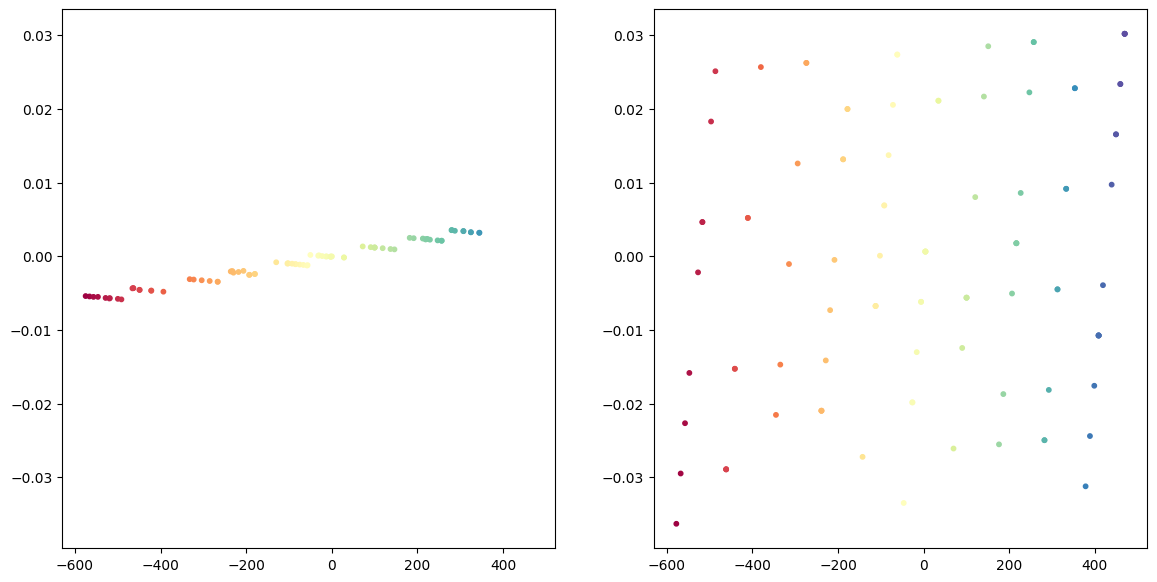

In [7]:
reload(pipeline)
ld_embedding = pipeline.reduce_dimensions(q)
regression_matrix = pipeline.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

rre = pipeline.compute_rre(ld_embedding, reconstructed_y)
pipeline.plot_rre_heatmap(rre, reconstructed_y)
print(np.median(rre))
pipeline.plot_two_embeddings(ld_embedding, reconstructed_y)

In [16]:
reload(pipeline)
test_control_vars = pipeline.get_control_vars(pipeline.get_p(), 300)
test_rolls = pipeline.generate_array_of_swiss_rolls(test_control_vars, 300)
x_opts = []
for (roll, control_var) in zip(test_rolls, test_control_vars):
    x_opt, x_err = pipeline.predictive_optimization(roll, centered_y, ld_embedding, regression_matrix, y_means, y_scaler)
    x_opt = x_opt * x_stds + x_means
    x_opts.append(x_opt)
    print("-----------")
    print(f"x_opt  = {x_opt}, x_err = {x_err}")
    print(f"x_real = {control_var}")

x_ops = np.array(x_opts)
test_control_vars = np.array(test_control_vars)

-----------
x_opt  = [4.02080536 6.81400503], x_err = 1.0241624297478307e-11
x_real = [8, 6]
-----------
x_opt  = [4.04544655 2.51492386], x_err = 1.033920803813623e-11
x_real = [1, 2]
-----------
x_opt  = [1.64665432 5.75260627], x_err = 1.1859637736409356e-11
x_real = [4, 5]
-----------
x_opt  = [2.48260054 7.7423918 ], x_err = 8.983989856145405e-12
x_real = [7, 9]
-----------
x_opt  = [7.651357   5.17443309], x_err = 1.1132827883984221e-11
x_real = [5, 4]
-----------
x_opt  = [8.34479167 3.77475056], x_err = 9.51978863214075e-12
x_real = [4, 4]
-----------
x_opt  = [1.85834871 9.50682398], x_err = 7.90819881701747e-12
x_real = [1, 9]
-----------
x_opt  = [8.29710453 6.42461735], x_err = 9.031677683961642e-12
x_real = [7, 7]
-----------
x_opt  = [2.14651034 9.19590394], x_err = 9.605137537189569e-12
x_real = [4, 10]
-----------
x_opt  = [1.82633419 7.67973671], x_err = 7.961558033996075e-12
x_real = [7, 9]
-----------
x_opt  = [8.60767125 2.16006837], x_err = 505.4419902358873
x_real

[4.06159995 3.08867144 2.47075942 4.68918716 2.89982535 4.35062662
 0.99681144 1.41899449 2.02039461 5.33946749 4.75146219 2.74957787
 6.93667036 1.22461442 5.8962002  5.19695296 4.29387819 2.93302651
 2.34647937 1.21999336 0.66501016 0.5687784  3.48699569 1.10880365
 4.38797259 1.91279014 3.67267546 3.31012236 0.81130964 2.23961078
 2.886089   3.82451864 5.2280065  4.48981466 4.51525759 1.62319441
 3.78959766 2.5807395  4.1524561  1.66772638 1.69338953 4.8404872
 0.9478456  4.75146219 2.64635857 2.85406867 3.38261307 2.23387618
 3.19465062 5.91798921 5.72640685 3.80926674 1.22461442 2.43100278
 1.24196366 2.49584939 7.47911475 6.18357259 2.49012688 2.74720299
 4.34537293 2.85406867 1.31801806 5.56642623 4.18831292 2.54077265
 2.53217785 5.00030791 1.17880072 5.7876723  6.65947656 5.49886718
 1.30958886 3.83992329 4.12182651 6.57011251 3.53501427 4.52354969
 0.79003474 0.60239771 0.68948266 1.62660714 4.27640188 2.93364953
 5.07035797 3.69610695 2.477501   6.85432452 1.80537644 2.72294

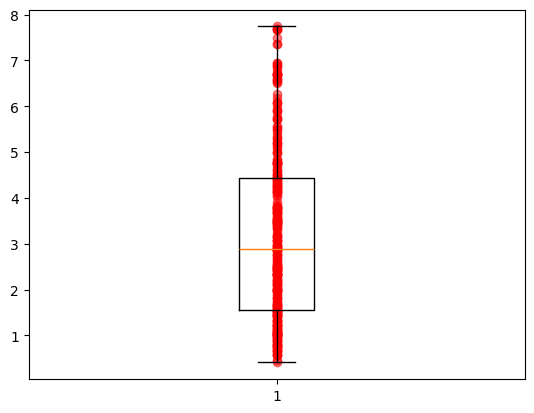

In [17]:
import matplotlib.pyplot as plt
errors = np.linalg.norm(x_opts - test_control_vars, axis = 1)
plt.boxplot(errors)
plt.scatter(np.ones_like(errors), errors, alpha=0.5, color='red')
print(errors)
print(f"Median of errors = {np.median(errors)}")